2024-07-30 15:30:53.644657: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-07-30 15:30:53.765107: I tensorflow/core/util/port.cc:104] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-07-30 15:30:54.519159: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2024-07-30 15:30:54.519266: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] 

Training data shape: (27455, 785)
Testing data shape: (7172, 785)
   label  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0      3     107     118     127     134     139     143     146     150   
1      6     155     157     156     156     156     157     156     158   
2      2     187     188     188     187     187     186     187     188   
3      2     211     211     212     212     211     210     211     210   
4     13     164     167     170     172     176     179     180     184   

   pixel9  ...  pixel775  pixel776  pixel777  pixel778  pixel779  pixel780  \
0     153  ...       207       207       207       207       206       206   
1     158  ...        69       149       128        87        94       163   
2     187  ...       202       201       200       199       198       199   
3     210  ...       235       234       233       231       230       226   
4     185  ...        92       105       105       108       133       163   

   pixel

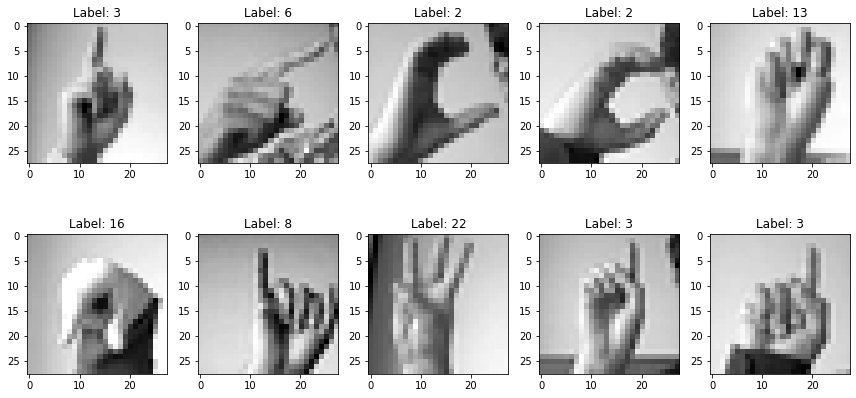

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
import matplotlib.pyplot as plt

# Load the dataset
train_df = pd.read_csv('sign_mnist_train.csv')
test_df = pd.read_csv('sign_mnist_test.csv')

# Explore the dataset
print("Training data shape:", train_df.shape)
print("Testing data shape:", test_df.shape)
print(train_df.head())

# Prepare the data
X_train = train_df.drop('label', axis=1).values
y_train = train_df['label'].values
X_test = test_df.drop('label', axis=1).values
y_test = test_df['label'].values

# Normalize the images
X_train = X_train / 255.0
X_test = X_test / 255.0

# Reshape the images to 28x28x1 (28x28 pixels with 1 channel for grayscale)
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

# One-hot encode the labels
y_train = to_categorical(y_train, num_classes=25)
y_test = to_categorical(y_test, num_classes=25)

# Display some sample images
plt.figure(figsize=(12, 6))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(X_train[i].reshape(28, 28), cmap='gray')
    plt.title(f'Label: {np.argmax(y_train[i])}')
plt.tight_layout()
plt.show()


In [2]:
!pip install datasets

# Import the datasets library
from datasets import load_dataset

# Load the Tatoeba dataset
dataset = load_dataset("tatoeba",'en-mr')

# Display a sample from the dataset
print(dataset['train'][0])

Defaulting to user installation because normal site-packages is not writeable
Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com

[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python3 -m pip install --upgrade pip


Found cached dataset tatoeba (/home/ec2-user/.cache/huggingface/datasets/tatoeba/en-mr/2021.7.22/b3ea9c6bb2af47699c5fc0a155643f5a0da287c7095ea14824ee0a8afd74daf6)


  0%|          | 0/1 [00:00<?, ?it/s]

{'id': '0', 'translation': {'en': "Today is June 18th and it is Muiriel's birthday!", 'mr': 'आज १८ जून आहे व आज म्यूरिएलचा वाढदिवस आहे!'}}


In [3]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
# Define the CNN model for gesture recognition
cnn_model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(25, activation='softmax')
])

# Compile the CNN model
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the CNN model
cnn_model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10, batch_size=64)

# Evaluate the model
test_loss, test_accuracy = cnn_model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_accuracy * 100:.2f}%')


2024-07-30 15:31:07.139222: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-07-30 15:31:07.146831: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-07-30 15:31:07.147426: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2024-07-30 15:31:07.148311: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operati

Epoch 1/10


2024-07-30 15:31:09.822194: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:428] Loaded cuDNN version 8101
2024-07-30 15:31:10.421022: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-07-30 15:31:10.966479: I tensorflow/compiler/xla/service/service.cc:173] XLA service 0x21eaa270 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-07-30 15:31:10.966515: I tensorflow/compiler/xla/service/service.cc:181]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
2024-07-30 15:31:10.971969: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-07-30 15:31:11.052229: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-07-30 15:31:11.116083: I tensorflow/compiler/jit/xla_compilation_cache.cc:477] Co

429/429 [==============================] - 6s 5ms/step - loss: 1.8719 - accuracy: 0.4164 - val_loss: 0.7606 - val_accuracy: 0.7857
Epoch 2/10
429/429 [==============================] - 2s 4ms/step - loss: 0.7017 - accuracy: 0.7614 - val_loss: 0.4068 - val_accuracy: 0.8703
Epoch 3/10
429/429 [==============================] - 2s 4ms/step - loss: 0.4156 - accuracy: 0.8540 - val_loss: 0.3072 - val_accuracy: 0.8981
Epoch 4/10
429/429 [==============================] - 2s 4ms/step - loss: 0.2901 - accuracy: 0.8965 - val_loss: 0.2763 - val_accuracy: 0.9152
Epoch 5/10
429/429 [==============================] - 2s 4ms/step - loss: 0.2129 - accuracy: 0.9261 - val_loss: 0.2540 - val_accuracy: 0.9297
Epoch 6/10
429/429 [==============================] - 2s 4ms/step - loss: 0.1697 - accuracy: 0.9403 - val_loss: 0.2380 - val_accuracy: 0.9193
Epoch 7/10
429/429 [==============================] - 2s 4ms/step - loss: 0.1488 - accuracy: 0.9464 - val_loss: 0.2403 - val_accuracy: 0.9236
Epoch 8/10
429/42

In [26]:
!pip install --user sentencepiece
!pip install --user transformers

Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com

[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python3 -m pip install --upgrade pip
Looking in indexes: https://pypi.org/simple, https://pip.repos.neuron.amazonaws.com

[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python3 -m pip install --upgrade pip


In [4]:
from transformers import M2M100ForConditionalGeneration, M2M100Tokenizer

# Load the pre-trained M2M100 model and tokenizer
model_name = "facebook/m2m100_418M"
tokenizer = M2M100Tokenizer.from_pretrained(model_name)
model = M2M100ForConditionalGeneration.from_pretrained(model_name)

# Set the source and target languages
source_lang = "ro"  # Source language (e.g., Romanian)
target_lang = "en"  # Target language (e.g., English)

# Example translation function
def translate(text, source_lang="ro", target_lang="en"):
    tokenizer.src_lang = source_lang
    encoded = tokenizer(text, return_tensors="pt")
    generated_tokens = model.generate(**encoded, forced_bos_token_id=tokenizer.get_lang_id(target_lang))
    return tokenizer.batch_decode(generated_tokens, skip_special_tokens=True)

# Test translation function
test_sentence = "Bună, ce mai faci?"  # Romanian for "Hello, how are you?"
translated_sentence = translate(test_sentence)
print(f"Translated sentence: {translated_sentence[0]}")



/home/ec2-user/.local/lib/python3.7/site-packages/transformers/generation/utils.py:1357: UserWarning: Using `max_length`'s default (200) to control the generation length. This behaviour is deprecated and will be removed from the config in v5 of Transformers -- we recommend using `max_new_tokens` to control the maximum length of the generation.
  UserWarning,


Translated sentence: What else do you do?


In [5]:
# Define mapping from gesture class to English sentence (placeholder for demonstration)
gesture_to_sentence = {
    0: "Hello",
    1: "Yes",
    2: "No",
    # Add more mappings based on the dataset and model training
    # ...
}

# Example function to recognize gesture and translate
def recognize_and_translate(image):
    # Recognize gesture
    gesture = cnn_model.predict(image.reshape(1, 28, 28, 1))
    gesture_class = np.argmax(gesture)
    
    # Get corresponding English sentence (Placeholder for actual mapping)
    english_sentence = gesture_to_sentence.get(gesture_class, "Unknown gesture")
    
    # Translate sentence
    translated_sentence = translate(english_sentence)
    return translated_sentence[0]

# Test the system with a sample image
sample_image = X_test[0]  # Replace with actual image data
output_translation = recognize_and_translate(sample_image)
print(f"Output Translation: {output_translation}")


1/1 [==============================] - 0s 128ms/step
Output Translation: Unknown gestures


In [6]:
# Save the trained CNN model
cnn_model.save('asl_recognition_model.h5')

# Save the translation model (if fine-tuned)
# translation_model.save_pretrained('translation_model')


225/225 [==============================] - 0s 2ms/step
Test accuracy: 92.88%


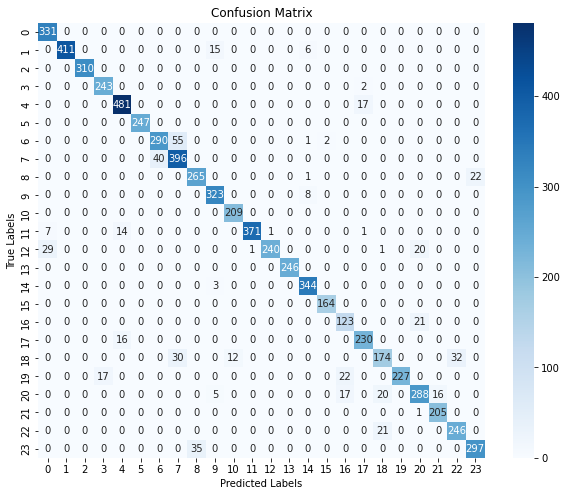

Classification Report:
               precision    recall  f1-score   support

           0       0.90      1.00      0.95       331
           1       1.00      0.95      0.98       432
           2       1.00      1.00      1.00       310
           3       0.93      0.99      0.96       245
           4       0.94      0.97      0.95       498
           5       1.00      1.00      1.00       247
           6       0.88      0.83      0.86       348
           7       0.82      0.91      0.86       436
           8       0.88      0.92      0.90       288
          10       0.93      0.98      0.95       331
          11       0.95      1.00      0.97       209
          12       1.00      0.94      0.97       394
          13       1.00      0.82      0.90       291
          14       1.00      1.00      1.00       246
          15       0.96      0.99      0.97       347
          16       0.99      1.00      0.99       164
          17       0.76      0.85      0.80       144
   

In [7]:
# Import necessary libraries for evaluation
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns

# Predict on the test set
y_pred = cnn_model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Calculate accuracy
accuracy = accuracy_score(y_true, y_pred_classes)
print(f'Test accuracy: {accuracy * 100:.2f}%')

# Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
print("Classification Report:\n", classification_report(y_true, y_pred_classes))


In [8]:
# Define some test sentences for translation (from recognized gestures)
test_sentences = [
    "Hello, how are you?",
    "What is your name?",
    "I am learning sign language.",
    "Good morning!",
    "Thank you!"
]

# Translate the test sentences
translated_sentences = [translate(sentence)[0] for sentence in test_sentences]

# Display the original and translated sentences
for i, sentence in enumerate(test_sentences):
    print(f"Original: {sentence}")
    print(f"Translated: {translated_sentences[i]}")
    print()


/home/ec2-user/.local/lib/python3.7/site-packages/transformers/generation/utils.py:1357: UserWarning: Using `max_length`'s default (200) to control the generation length. This behaviour is deprecated and will be removed from the config in v5 of Transformers -- we recommend using `max_new_tokens` to control the maximum length of the generation.
  UserWarning,


Original: Hello, how are you?
Translated: Hello, how are you?

Original: What is your name?
Translated: What is your name?

Original: I am learning sign language.
Translated: I have learning sign language.

Original: Good morning!
Translated: Good Morning!

Original: Thank you!
Translated: Thank you!



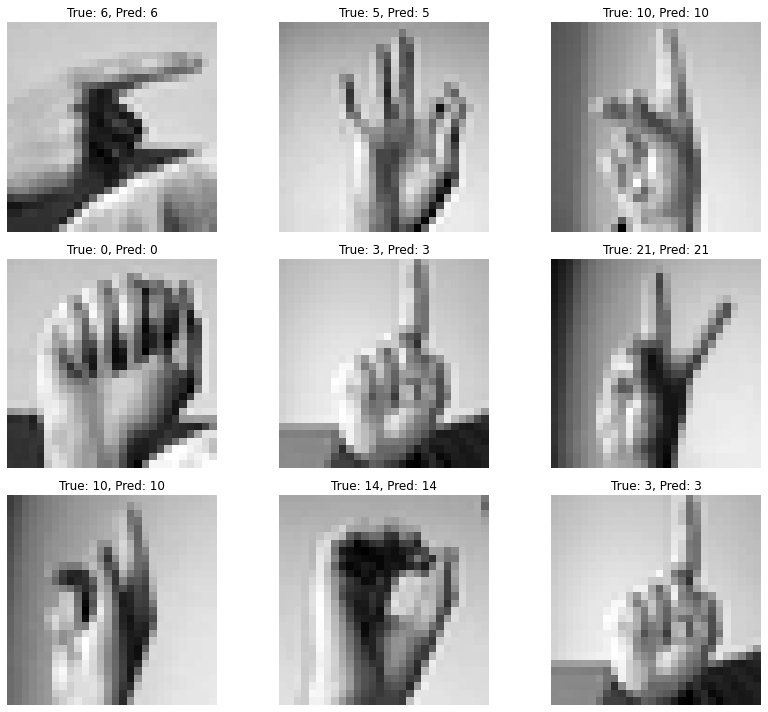

In [9]:
# Plot a few examples of the model's predictions
plt.figure(figsize=(12, 10))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
    plt.title(f"True: {y_true[i]}, Pred: {y_pred_classes[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()
